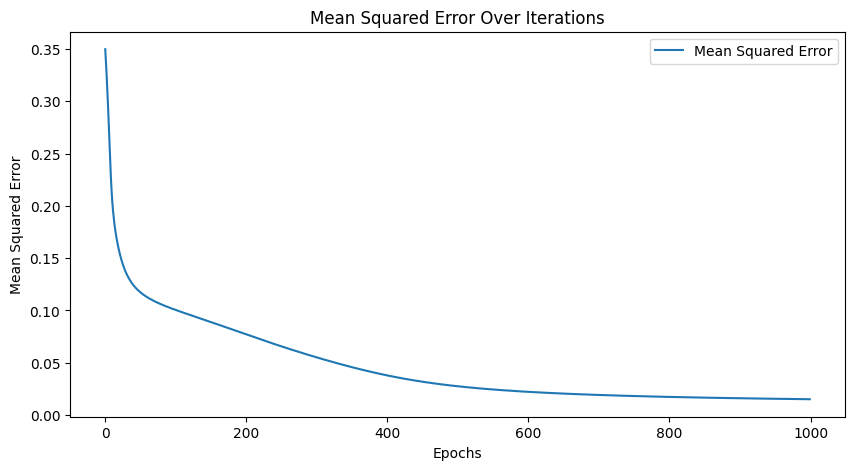

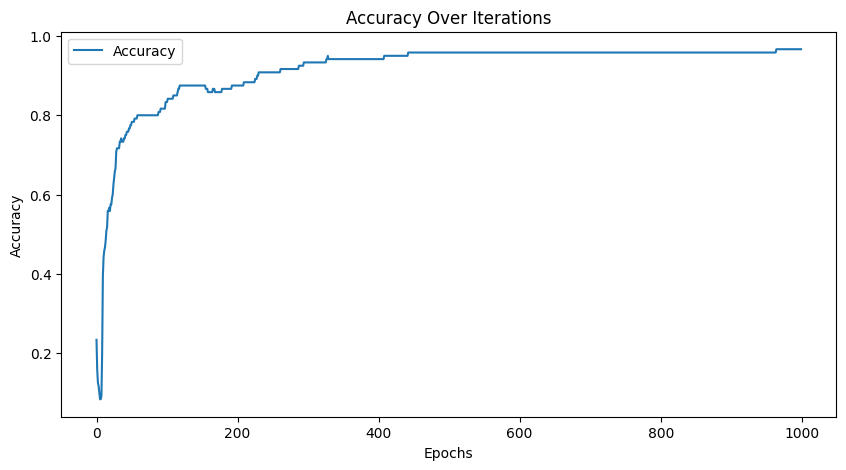

Accuracy on Test Data: 0.9666666666666667


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target variable
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Neural Network parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_one_hot.shape[1]
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the neural network
mse_list = []
accuracy_list = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_train - predicted_output
    mse = mean_squared_error(y_train, predicted_output)
    mse_list.append(mse)

    # Calculate accuracy
    predictions = np.argmax(predicted_output, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    accuracy_list.append(accuracy)

    # Update weights and biases
    output_error = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    biases_output += np.sum(output_error, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X_train.T.dot(hidden_layer_error) * learning_rate
    biases_hidden += np.sum(hidden_layer_error, axis=0, keepdims=True) * learning_rate

# Plot Mean Squared Error
plt.figure(figsize=(10, 5))
plt.plot(mse_list, label='Mean Squared Error')
plt.title('Mean Squared Error Over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracy_list, label='Accuracy')
plt.title('Accuracy Over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
hidden_layer_input = np.dot(X_test, weights_input_hidden) + biases_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
predicted_output = sigmoid(output_layer_input)

# Calculate accuracy on test data
predictions_test = np.argmax(predicted_output, axis=1)
true_labels_test = np.argmax(y_test, axis=1)
accuracy_test = accuracy_score(true_labels_test, predictions_test)

print(f"Accuracy on Test Data: {accuracy_test}")
